In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_ds = train_ds.flow_from_directory('training_set/training_set', target_size=(64, 64), 
                                        batch_size=32, class_mode='binary')

Found 8005 images belonging to 2 classes.


In [3]:
test_ds = ImageDataGenerator(rescale = 1./255)
test_ds = test_ds.flow_from_directory('test_set/test_set/', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')

Found 2023 images belonging to 2 classes.


In [5]:
# groups a linear stack of layers into a tf.keras.Model.
model = tf.keras.models.Sequential()

# activation='relu' - Застосовує функцію активації випрямленої linear unit.
# input_shape=[64, 64, 3] (для картинки розміром 64х64) / задаєм цей аргумент, оскільки це перший шар моделі.
# Conv2d - шар 2D згортки (наприклад, просторова згортка над зображеннями).
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#MaxPool2D - максимальна операція об’єднання для двовимірних просторових даних.
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [6]:
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [7]:
# Flatten - Згладжує введення. Не впливає на batch_size.
# Batch_size визначає кількість зразків, які будуть поширюватися через мережу.
# Якщо у нас наприклад є 1050 зразків для навчання, ми візьмемо batch_size 100 і будемо брати з 0 - 100 і навчати, потім 101 - 200, ...
# І в кінці залишаться 50 і цьому може бути проблема. Тут і допоможе batch_size=50. 
model.add(tf.keras.layers.Flatten())

In [8]:
# Dence - Просто ваш звичайний щільно зв’язаний шар NN.
# units - Ціле додатне число, розмірність вихідного простору.
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [9]:
# activation='sigmoid' - Сигмовидна функція активації, sigmoid(x) = 1 / (1 + exp(-x)).
# Для малих значень (<-5) sigmoidповертає значення, близьке до нуля,
# а для великих значень (>5) результат функції наближається до 1.
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
#The compile() method: specifying a loss, metrics, and an optimizer
#To train a model with fit(), you need to specify a loss function, an optimizer, and optionally, some metrics to monitor.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
epochs = 20
# callbacks (save the model at each epoch)
callbacks = [
    keras.callbacks.ModelCheckpoint("checkpoints/model_at_{epoch}.h5"),
]
model.fit(x=train_ds, validation_data=test_ds, epochs=epochs, callbacks=callbacks)

Epoch 1/20
251/251 [==============================] - 46s 185ms/step - loss: 0.3320 - accuracy: 0.8500 - val_loss: 0.5225 - val_accuracy: 0.7800
Epoch 2/20
251/251 [==============================] - 49s 196ms/step - loss: 0.3226 - accuracy: 0.8593 - val_loss: 0.4518 - val_accuracy: 0.8038
Epoch 3/20
251/251 [==============================] - 48s 192ms/step - loss: 0.3179 - accuracy: 0.8601 - val_loss: 0.4814 - val_accuracy: 0.7879
Epoch 4/20
251/251 [==============================] - 49s 196ms/step - loss: 0.2950 - accuracy: 0.8730 - val_loss: 0.4884 - val_accuracy: 0.7909
Epoch 5/20
251/251 [==============================] - 49s 197ms/step - loss: 0.2813 - accuracy: 0.8776 - val_loss: 0.4638 - val_accuracy: 0.8117
Epoch 6/20
251/251 [==============================] - 52s 208ms/step - loss: 0.2685 - accuracy: 0.8823 - val_loss: 0.4652 - val_accuracy: 0.8127
Epoch 7/20
251/251 [==============================] - 50s 201ms/step - loss: 0.2546 - accuracy: 0.8946 - val_loss: 0.5023 - val_ac

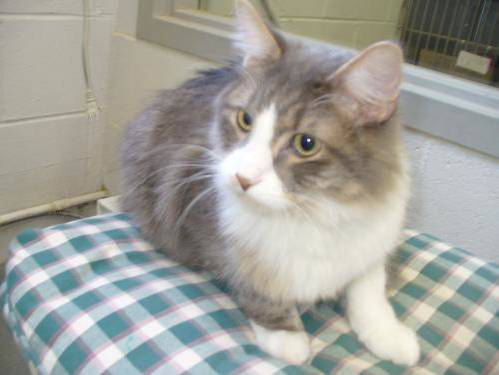

In [35]:
tf.keras.utils.load_img('training_set/training_set/cats/cat.1029.jpg')

In [59]:

test_img = tf.keras.utils.load_img('cat_dog_to_predict/4.jpg', target_size = (64, 64))
img = tf.keras.utils.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train_ds.class_indices
if r[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'


1/1 [==============================] - 0s 23ms/step


In [60]:
print(pred)

dog


In [61]:
'''
def make_prediction(cats_or_dogs_directory, cat_or_dog, img_num):
  img = tf.keras.utils.load_img(
      f'training_set/training_set/{cats_or_dogs_directory}/{cat_or_dog}.{img_num}.jpg', target_size=(64, 64)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(['Cat', 'Dog'][np.argmax(score)], 100 * np.max(score))
  )
'''

In [62]:
'''
make_prediction('dogs', 'dog', 616)
make_prediction('dogs', 'dog', 666)
make_prediction('dogs', 'dog', 946)
make_prediction('dogs', 'dog', 1780)


make_prediction('cats', 'cat', 616)
make_prediction('cats', 'cat', 666)
make_prediction('cats', 'cat', 946)
make_prediction('cats', 'cat', 1780)
'''

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to Cat with a 100.00 percent confidence.
1/1 [==============================] - 0s 19ms/step
This image most likely belongs to Cat with a 100.00 percent confidence.
1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Cat with a 100.00 percent confidence.
1/1 [==============================] - 0s 23ms/step
This image most likely belongs to Cat with a 100.00 percent confidence.
1/1 [==============================] - 0s 16ms/step
This image most likely belongs to Cat with a 100.00 percent confidence.
1/1 [==============================] - 0s 23ms/step
This image most likely belongs to Cat with a 100.00 percent confidence.
1/1 [==============================] - 0s 29ms/step
This image most likely belongs to Cat with a 100.00 percent confidence.
1/1 [==============================] - 0s 25ms/step
This image most likely belongs to Cat with a 100.00 percent confidence.
1/1 [===